# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# Introduction

Ionosphere is the ionized part of Earth's upper atmosphere, from about 48 km 965 km altitude. Our task is to distinguish different type of radar returns to understand if at the time of return ionosphere had some meaningful structure of free electrons. We perform a comprehensive analysis of data at hand and use XGBoost to perform the fully supervised classification task. This work can is divided into the following sections:

- Exploratory Data analysis
- Data Preprocessing
- Model Optimization & Classification

<img src="../../misc/ionosphere.gif" width="900">
<img src="../../misc/ionosphere.png" width="600">


# Dataset Description

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. 

The targets were free electrons in the ionosphere:

- "Good" radar returns are those showing evidence of some type of structure in the ionosphere. 

- "Bad" returns are those that do not; their signals pass through the ionosphere. 

Extreme UltraViolet (EUV) and x-ray solar radiation ionizes the atoms and molecules inside Ionosphere thus creating a layer of electrons. Ionosphere is important because it reflects and modifies radio waves used for communication and navigation. Other phenomena such as energetic charged particles and cosmic rays also have an ionizing effect and can contribute to the ionosphere.

The radar operates by transmitting a multipulse pattern to the ionosphere. It produces 17 pairs of numbers every 0.2 s all year round. Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this dataset are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal. 


## Task

This is a binary classification task and we will deploy an XGBoost model to classify of radar returns from the ionosphere and make radar predictions on future data.


## Features

The dataset contains 351 distinct radar returns. Each return produces 17 pairs of complex numbers. Numbers are reported as features and divided into real and imaginary parts giving us a total of 34 features.
All features are continuous and contain no missing values. All 34 features are continuous.

The 35th attribute is either "good" or "bad" according to the definition summarized above.
Good returns can be labelled as 1 whereas Bad returns can labelled as 0.


**Source:** 
- http://archive.ics.uci.edu/ml/datasets/Ionosphere
- https://archive-beta.ics.uci.edu/dataset/52/ionosphere      

# Data Wrangling

Load the file `ionosphere_data.csv` which is located in the data subfolder `datasets/` and perform your Exploratory Data Analysis, including feature correlations, feature distributions, label balancing, etc. Consider dropping features if they don't provide any information.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../../datasets/ionosphere_data.csv")

In [4]:
df.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [5]:
df.isna().any().any()

np.False_

In [16]:
target="label"

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [24]:
unique = df.nunique().sort_values(ascending=False)
unique

feature28    281
feature18    280
feature26    273
feature16    270
feature4     269
feature12    269
feature10    267
feature30    266
feature20    266
feature14    266
feature22    265
feature24    264
feature34    263
feature32    263
feature8     260
feature6     259
feature27    256
feature25    256
feature19    254
feature17    254
feature21    248
feature23    248
feature11    246
feature33    245
feature9     244
feature29    244
feature31    243
feature13    238
feature15    234
feature7     231
feature3     219
feature5     204
feature1       2
label          2
dtype: int64

In [23]:
df = df.drop("feature2", axis=1) # because feature 2 is a constant value

In [25]:
corr = df.corr()["label"].sort_values(ascending=False).iloc[1:]

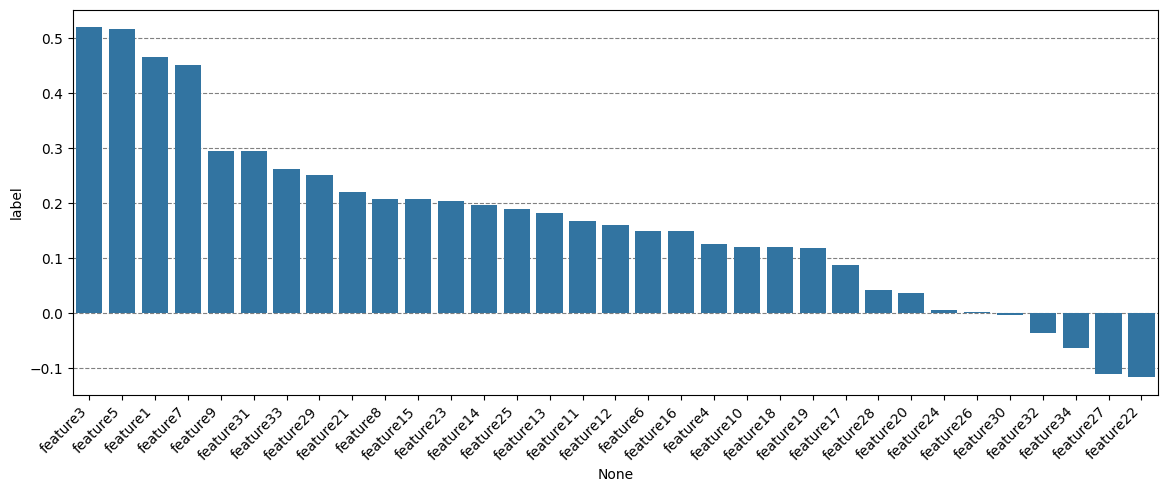

In [26]:
fig, ax = plt.subplots(figsize=(14,5))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
sns.barplot(x=corr.index, y=corr)
plt.xticks(rotation = 45, ha='right');

In [30]:
corr[ np.abs(corr) < 0.01]

feature24    0.006193
feature26    0.001541
feature30   -0.003942
Name: label, dtype: float64

In [31]:
df = df.drop(["feature24", "feature26", "feature30"], axis=1)

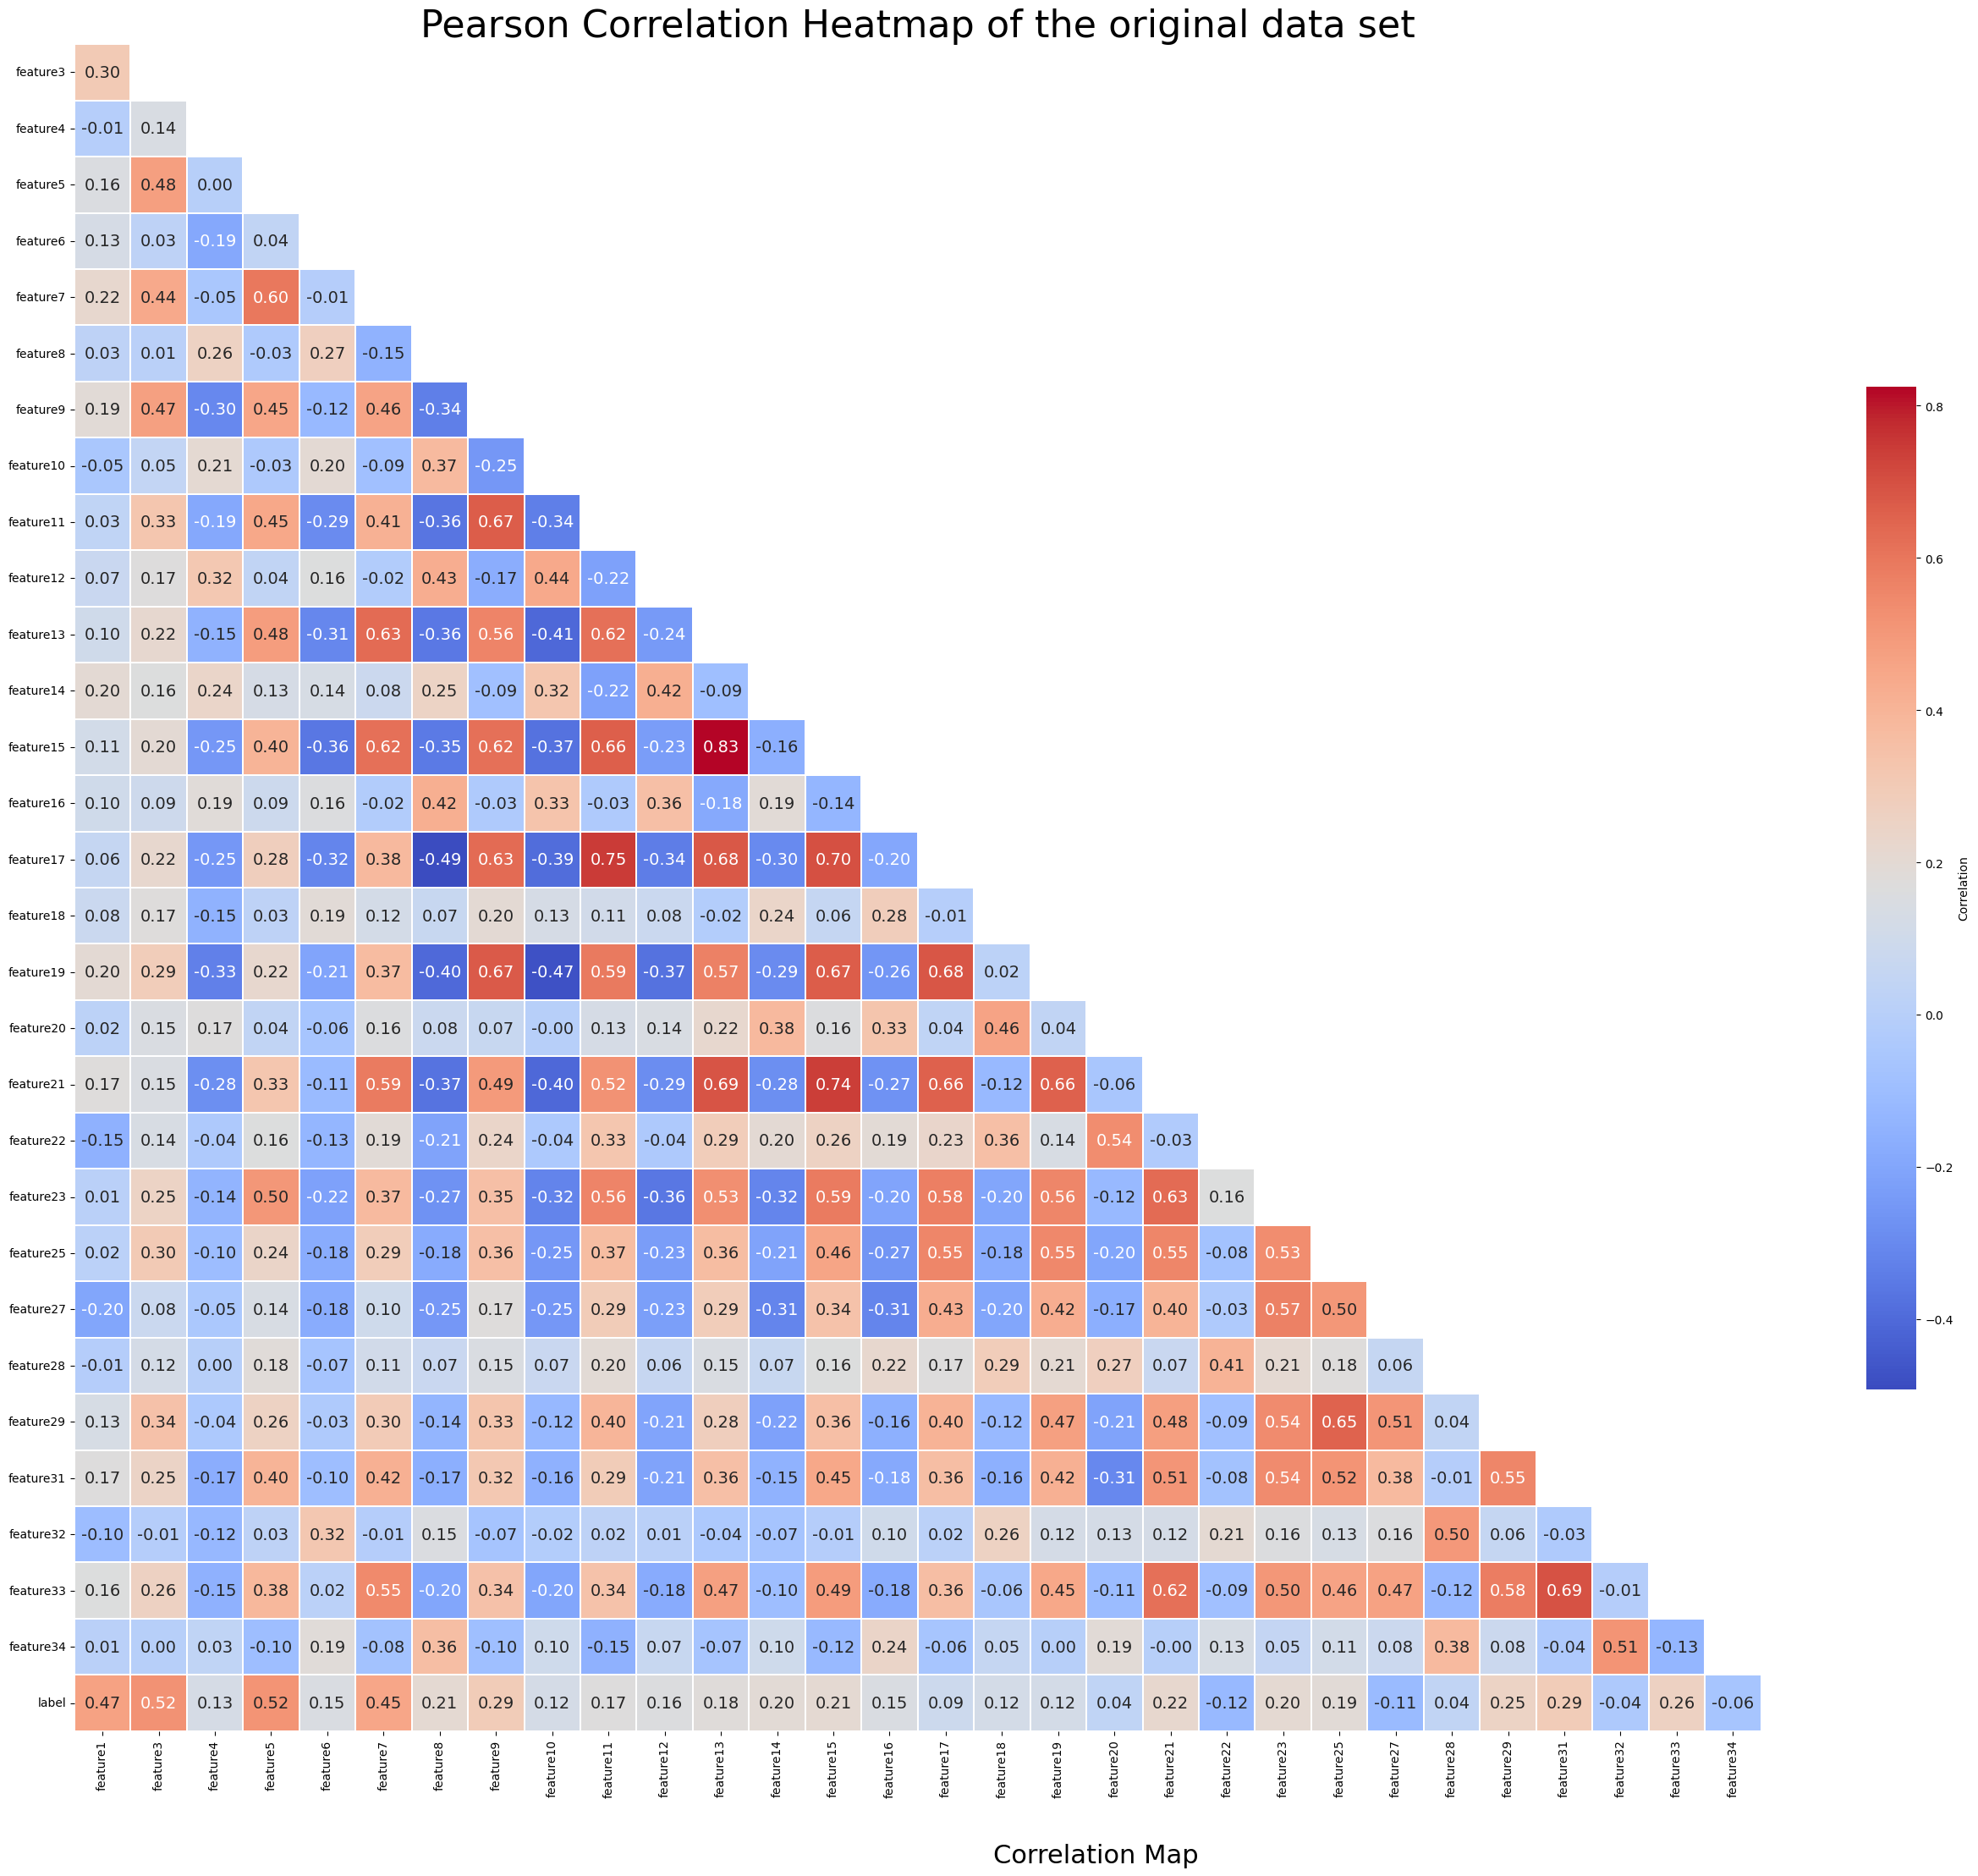

In [32]:
corr_df = df.corr()
mask = np.triu(corr_df)
mask = mask[1:, :-1]
corr_df = corr_df.iloc[1:,:-1].copy()

f,ax=plt.subplots(figsize=(26,24))
fig = sns.heatmap(corr_df,annot=True,fmt=".2f", ax=ax, 
                  linecolor="white", linewidths=0.1 ,
                  mask = mask, square=True, 
                  annot_kws={"size": 14}, cbar_kws = {"shrink":0.5, 'label': 'Correlation'},
                  cmap= 'coolwarm', rasterized=False)

plt.xticks(rotation= 90, ha = 'center')
plt.yticks(rotation= 0)

plt.title('Pearson Correlation Heatmap of the original data set', fontdict= {"fontsize":32})
plt.figtext(0.5,0.02, "Correlation Map", fontsize = 22, ha = 'center')
plt.tight_layout()

In [36]:
c = df.corr().abs().unstack()
se_c = c.sort_values(kind="quicksort", ascending=False)
df_c = pd.DataFrame(se_c).reset_index().rename({'level_0':"f1", 'level_1':"f2", 0:"corr_val"}, axis=1)
df_c = df_c[ df_c.f1 != df_c.f2]
df_c[df_c.corr_val > 0.8]

,f1,f2,corr_val
31,feature13,feature15,0.825558
32,feature15,feature13,0.825558


In [37]:
df.corr()["label"]["feature13"]
df.corr()["label"]["feature15"]

np.float64(0.20720095673281907)

In [ ]:
df = df.drop("feature13", axis=1) # we can drop feature 13 because it is really similar to feature 15, but doesn't provide
# as much label related info as feature 15 

In [38]:
value_count =  df[target].value_counts()

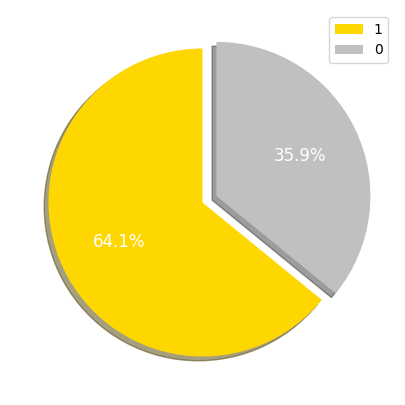

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(value_count.values / np.sum(value_count.values),
          autopct = lambda x: '{:.1f}%'.format(x),
          labels = value_count.index,
          shadow = True,
          colors=['gold', 'silver'], 
          textprops = dict(color ="white", size="large"),
          startangle = 90,
          explode=[0, 0.1]
         )                             
ax.legend();

# Data Preparation

Prepare you feature and target datasets. Also, split the data into train and test sets. Keep data samples for testing purposes. 

In [69]:
X = df.drop(target, axis=1)
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=35, shuffle = True)
X_train.shape, X_test.shape

((316, 30), (35, 30))

# Base Model

Train an XGBoost classifer, aka `XGBClassifier`, using its default setup. Use the train set to train the classifier and the test to evaluate. Choose your favourite classifcation metrics. Consider also looking at the learning curves. It is generally a good idea asking the model to stop early if there's no progress during learning. Show a plot with the feature importances and a confusion metric. Is your model overfitting?

In [79]:
import xgboost as xgb

In [80]:
eval_set=[(X_train, y_train), (X_test, y_test)]

In [81]:
xgb_params = dict(objective="binary:logistic",
                            early_stopping_rounds=10, 
                            eval_metric=['error','logloss'],
                            random_state=33,
                 )

In [82]:
xgb_clf = xgb.XGBClassifier(**xgb_params)

In [83]:
xgb_clf.fit(X_train,y_train, eval_set=eval_set, verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['error', 'logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=33, ...)

In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [85]:
def evaluate(model:xgb.XGBClassifier,
             X_train: pd.DataFrame, 
             y_train: pd.Series,
             X_test: pd.DataFrame,
             y_test: pd.Series) ->dict[str, float]:
    
    y_train_pred_cls = model.predict(X_train) 
    y_train_pred_prb = model.predict_proba(X_train)
        
    y_test_pred_cls = model.predict(X_test)
    y_test_pred_prb = model.predict_proba(X_test)
        
        
    return {
        "accuracy_train": accuracy_score(y_train, y_train_pred_cls), 
        "accuracy_test": accuracy_score(y_test, y_test_pred_cls), # same as model.score(X_test,y_test)
        "roc_auc_train": roc_auc_score(y_train, y_train_pred_prb[:,1]),
        "roc_auc_test": roc_auc_score(y_test, y_test_pred_prb[:,1]),
        "f1_train": f1_score(y_train, y_train_pred_cls), 
        "f1_test": f1_score(y_test, y_test_pred_cls),
    }
    

In [86]:
def show_learning_curves(model:xgb.XGBClassifier):
    # preparing evaluation metric plots
    results = model.evals_result()
    epochs = len(results['validation_0']['logloss'])
    x_axis = range(0, epochs)

    # xgboost 'mlogloss' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('log-loss')
    plt.title('XGBoost log-loss')
    plt.show()

    # xgboost 'merror' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('error')
    plt.title('XGBoost error')
    plt.show()

In [87]:
datasets = dict(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [88]:
evaluate(model=xgb_clf, **datasets)

{'accuracy_train': 0.9968354430379747,
 'accuracy_test': 0.9142857142857143,
 'roc_auc_train': np.float64(0.9999999999999999),
 'roc_auc_test': np.float64(0.9591836734693877),
 'f1_train': np.float64(0.9975550122249389),
 'f1_test': np.float64(0.9333333333333333)}

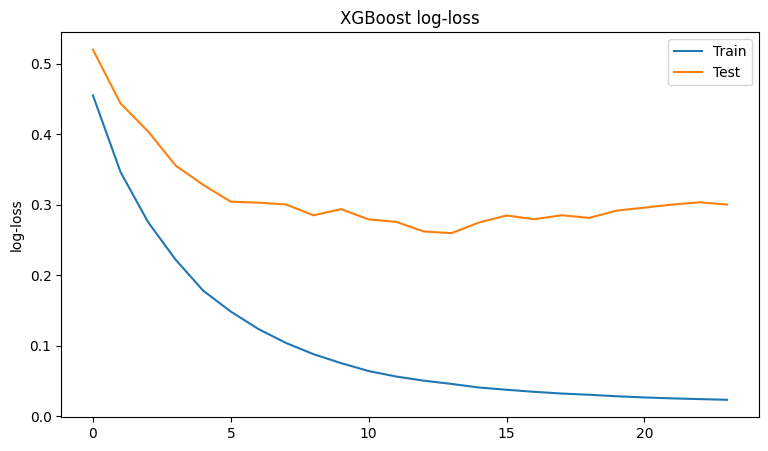

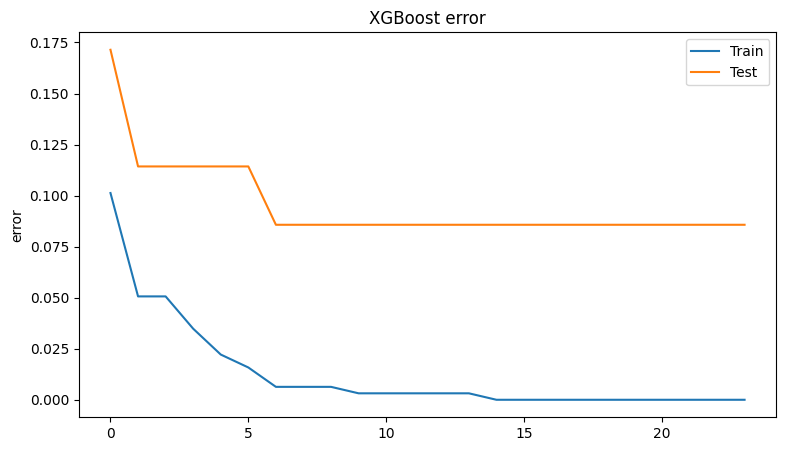

In [89]:
show_learning_curves(model=xgb_clf)

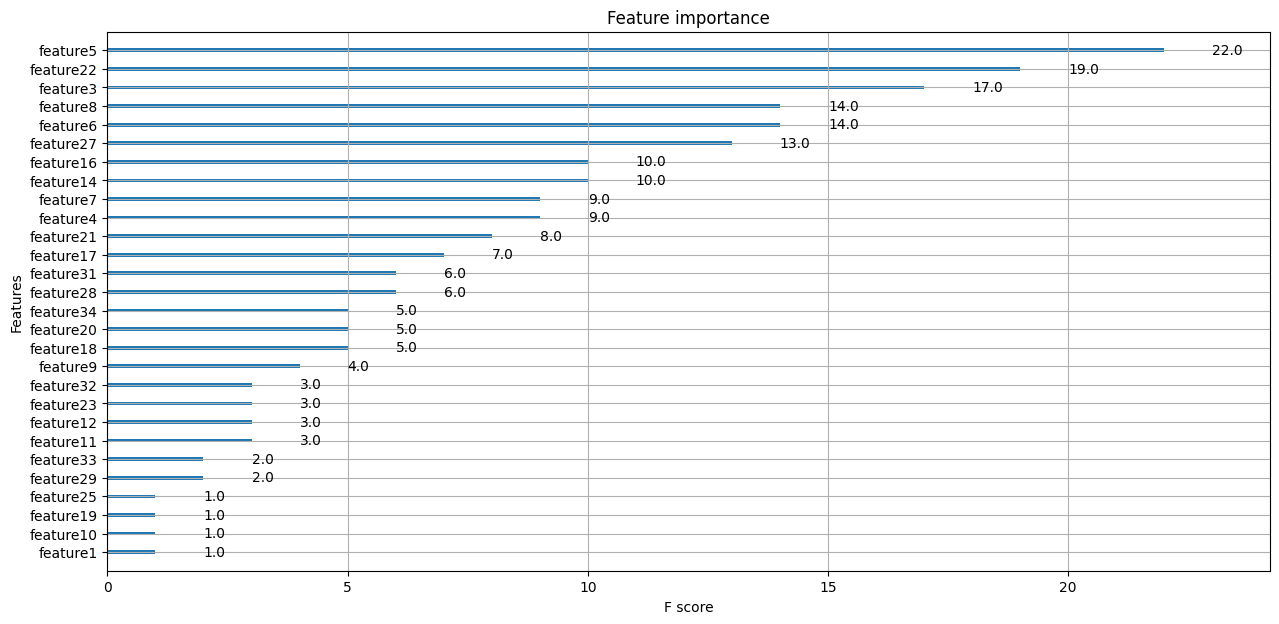

In [90]:
fig, ax=plt.subplots(figsize=(15,7))
ax=xgb.plot_importance(xgb_clf,ax=ax)
plt.show();

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

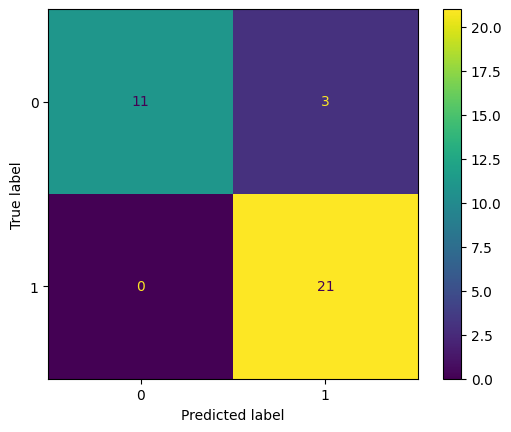

In [92]:
cm = confusion_matrix(y_test, xgb_clf.predict(X_test), labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot();

# Best Model

Perform an exhaustive search over a specified grid parameter set for your estimator and detect the best tune. Display the feature importance plot, learning curves and confusion matrix for your best model. Evaluation your model on the train & test sets. Hopefully, the overfitting is less than before.

In [58]:
from sklearn.model_selection import GridSearchCV
import time, os

In [93]:
n_cores = os.cpu_count()-1

In [95]:
params = {
        'n_estimators': [10, 25, 50, 75, 100],
        'max_depth': [1, 2, 3, 5, 7, 10],
        'eta': [0.05, 0.1, 0.5, 1]
        }

In [96]:
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(**xgb_params), 
                           param_grid=params, 
                           n_jobs=n_cores)

In [97]:
start = time.time()
grid_results = grid_search.fit(X_train, y_train, eval_set=eval_set, verbose=0)
end = time.time()
print(f"{end-start} secs")

21.47577166557312 secs


In [98]:
grid_search.best_params_

{'eta': 0.1, 'max_depth': 2, 'n_estimators': 75}

In [99]:
best_model = grid_search.best_estimator_

In [100]:
df_imp = pd.DataFrame([best_model.feature_importances_], 
                      columns=X_train.columns).T.rename({0:"importance"}, axis=1).sort_values("importance", 
                                                                                              ascending=False)

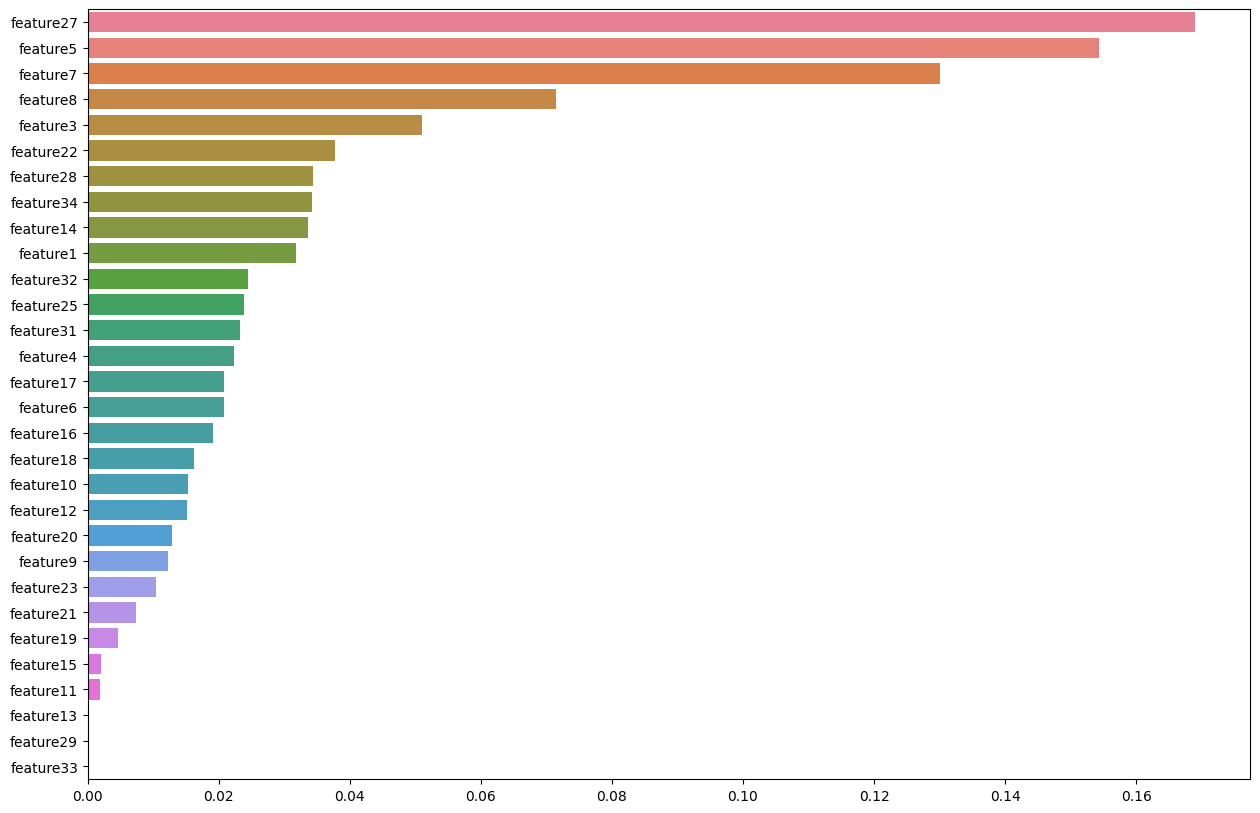

In [101]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
sns.barplot(df_imp.T, orient="h")
plt.show()

In [102]:
evaluate(model=best_model, **datasets)

{'accuracy_train': 0.9715189873417721,
 'accuracy_test': 0.9428571428571428,
 'roc_auc_train': np.float64(0.9975052521008404),
 'roc_auc_test': np.float64(0.9659863945578232),
 'f1_train': np.float64(0.9784172661870504),
 'f1_test': np.float64(0.9545454545454546)}

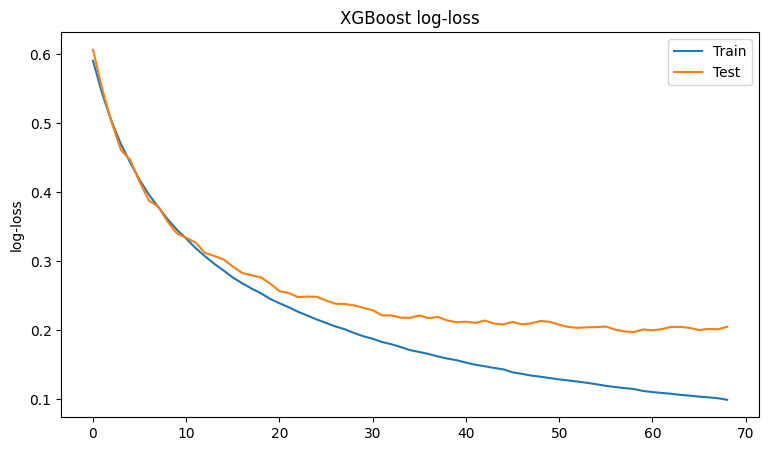

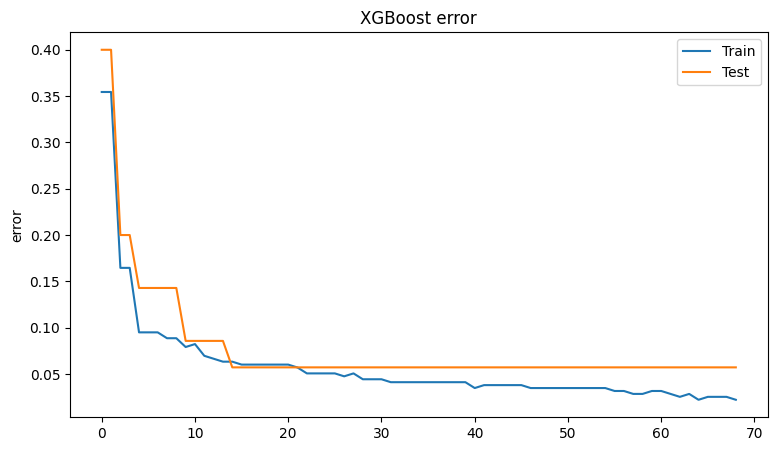

In [103]:
show_learning_curves(model=best_model)

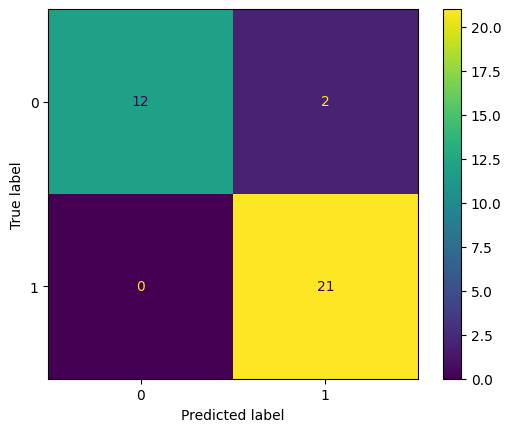

In [104]:
cm = confusion_matrix(y_test, best_model.predict(X_test), labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot();

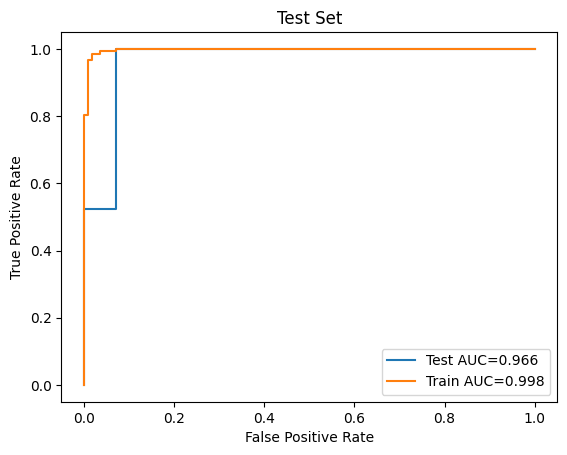

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score_test = best_model.predict_proba(X_test)[:,1]
fpr_test, tpr_test, _ = roc_curve(y_true=y_test, y_score=y_score_test)
roc_auc_score_test = roc_auc_score(y_test, y_score_test)
plt.plot(fpr_test, tpr_test, label=f"Test AUC={roc_auc_score_test:.3f}")

y_score_train = best_model.predict_proba(X_train)[:,1]
fpr_train, tpr_train, _ = roc_curve(y_true=y_train, y_score=y_score_train)
roc_auc_score_train = roc_auc_score(y_train, y_score_train)
plt.plot(fpr_train, tpr_train, label=f"Train AUC={roc_auc_score_train:.3f}")

plt.title("Test Set")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend();

# Full Model

Build your final model and train it over the entire dataset. Cross-validate it and show its learning curves.

In [110]:
full_params = xgb_params | grid_search.best_params_
xgb.XGBRegressor(**full_params)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eta=0.1,
             eval_metric=['error', 'logloss'], feature_types=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=75, n_jobs=None,
             num_parallel_tree=None, ...)

In [111]:
xgb_clf.fit(X, y, eval_set=eval_set, verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['error', 'logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=33, ...)

In [112]:
dM_X = xgb.DMatrix(X, y, feature_names=X.columns)

TypeError: Expecting a sequence of strings for feature names, got: <class 'pandas.core.indexes.base.Index'>

In [109]:
cv_results = xgb.cv(params=full_params, 
                    dtrain=dM_X,
                    nfold=5, 
                    stratified=True,
                    num_boost_round=50,
                    early_stopping_rounds=10,
               )

NameError: name 'dM_X' is not defined

# Outstanding!